In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from IPython.display import display

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsRegressor 

from sklearn.linear_model import ElasticNet, Ridge, Lasso, Lars, LinearRegression
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

# pip install category-encoders

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import classification_report, mean_absolute_percentage_error

from sklearn.cluster import DBSCAN

from sklearn.svm import SVR

from sklearn.inspection import permutation_importance

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_B.csv' # содержит только имя файла, без имен папок

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [8]:
y = np.array(train.price)
X = train.drop(columns=['price'])

In [9]:
en = ElasticNet(alpha = 1, l1_ratio = 0.7)
en.fit(X, y)

ElasticNet(alpha=1, l1_ratio=0.7)

In [10]:
threshold = 0.02
result = permutation_importance(en, X, y, n_repeats=10, random_state=42)
feature_importances = result.importances_mean
selected_features = X.columns[feature_importances > threshold]
selected_features

Index(['0', '2', '12', '15', '20', '22', '24', '25', '27'], dtype='object')

In [11]:
def features_selection_en(data):
    selected_features = data.columns[result.importances_mean > threshold]
    df_filtered = data.loc[:, selected_features]
    return df_filtered

features_transformer_en = FunctionTransformer(features_selection_en, validate=False)

features_selection_transformer = Pipeline(steps = [
    ('features_selection_transformer', features_transformer_en),
    ('scaler', StandardScaler())
    ])

In [12]:
col = X.columns

In [13]:
CT = ColumnTransformer([
        ("features_selection_transformer", features_selection_transformer, col),
        ]
    ,remainder='drop'
)

display(CT)
CT.set_output(transform ='pandas')
res_ct = pd.DataFrame(CT.fit_transform(X))
res_ct.head()

ColumnTransformer(transformers=[('features_selection_transformer',
                                 Pipeline(steps=[('features_selection_transformer',
                                                  FunctionTransformer(func=<function features_selection_en at 0x7ff65e71b2e0>)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28'],
      dtype='object'))])

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


,features_selection_transformer__0,features_selection_transformer__2,features_selection_transformer__12,features_selection_transformer__15,features_selection_transformer__20,features_selection_transformer__22,features_selection_transformer__24,features_selection_transformer__25,features_selection_transformer__27
0,1.212375,-1.046070,-0.219844,-0.703211,-0.520604,-0.547798,-0.768230,-0.962697,-0.679975
1,-0.113762,-0.486372,-0.219844,1.422049,-0.520604,-0.547798,-0.768230,0.185784,1.470643
2,1.212375,0.359078,-0.219844,-0.703211,-0.520604,-0.547798,0.388367,-0.962697,1.470643
3,1.212375,-0.701277,-0.219844,1.422049,-0.520604,-0.547798,-0.768230,0.185784,-0.679975
4,-1.439899,-1.071575,-0.219844,-0.703211,1.920848,-0.547798,-0.768230,1.334264,-0.679975


In [14]:
best_pipe = Pipeline(steps = [
                            ('preproc',CT),
                            ('estimator',ElasticNet(alpha = 0.1, l1_ratio = 0.1))
                        ])

best_pipe.fit(X, y)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('features_selection_transformer',
                                                  Pipeline(steps=[('features_selection_transformer',
                                                                   FunctionTransformer(func=<function features_selection_en at 0x7ff65e71b2e0>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28'],
      dtype='object'))])),
                ('estimator', ElasticNet(alpha=0.1, l1_ratio=0.1))])

In [15]:
# Блок предсказания с использованием тестового набора

In [16]:
y_pred_best = best_pipe.predict(test)

In [17]:
print('Колонки которые использовались для обучения модели:', '\n', res_ct.columns.str.extract(r'(\d+)$').values)

Колонки которые использовались для обучения модели: 
 [['0']
 ['2']
 ['12']
 ['15']
 ['20']
 ['22']
 ['24']
 ['25']
 ['27']]


In [18]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = y_pred_best

(137,) (137,)
Отрицательные цены -  0
Max Error: 5,048,610
 
----------------------
   MAPE Error: 17.33
----------------------


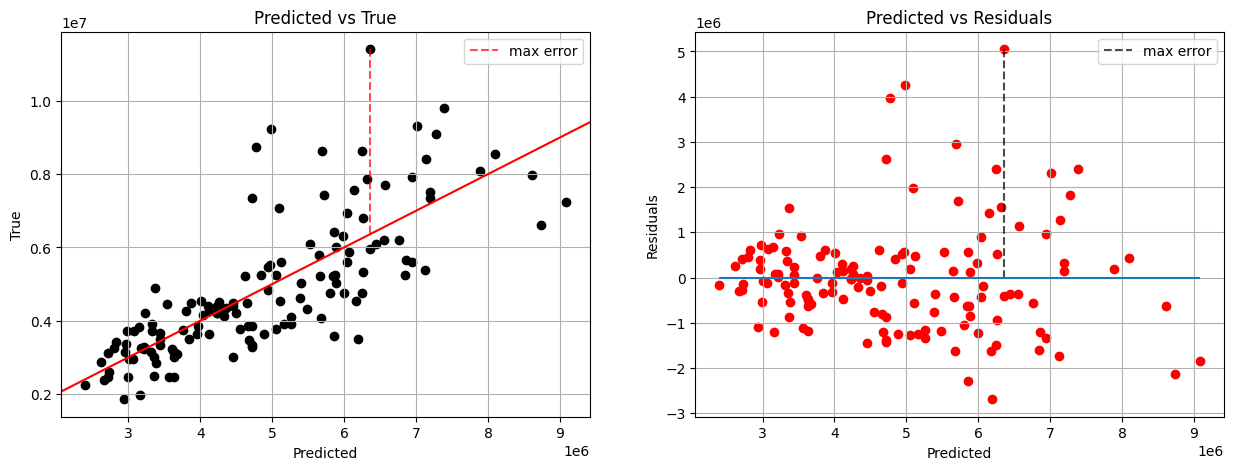

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [20]:
mask = selected_features

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
